In [1]:
from src.training import *
from src.pipeline.loaders import collate_numpy_matrices_without_conditions
from src.pipeline.datasets import ChunkedDiskCachedDatasetWrapper
import warnings
warnings.filterwarnings("ignore", message="Unknown entity 'ee-infinity-loader'")

has_been_cached = True  # Used to avoid reprocessing our dataset once we've done it once.

# Added something to speed up subsequent training.

dims = (20,20)
if not has_been_cached:
    rv = 5
    datalist = prepare_dataset(dims=dims, repr_version=rv)
    rotational_datalist = AugmentedListDataset(*datalist)
    cached_dataset = ChunkedDiskCachedDatasetWrapper(rotational_datalist,
                                                     # force_rebuild=not has_been_cached,
                                                     cache_dir='dataset_cache')
    # TODO don't i have to save the cache
else:
    cached_dataset = ChunkedDiskCachedDatasetWrapper.from_cache(cache_dir='dataset_cache')

dataloader = DataLoader(
    cached_dataset,
    batch_size=32, 
    collate_fn=collate_numpy_matrices_without_conditions
)
train_dataloader, test_dataloader = split_dataloader(dataloader, val_split=0.2)
train_dataloader, val_dataloader = split_dataloader(train_dataloader, val_split=0.2)

input_size = dims[0]

In [ ]:
from src.model import BinaryMatrixTransformCNN, AttentiveBinaryMatrixTransformCNN
from src.training import train_model

model = AttentiveBinaryMatrixTransformCNN(matrix_size=input_size)

train_model(model, train_loader=train_dataloader, val_loader=val_dataloader, integrity_weight=1.0,
            num_epochs=100, device='cuda')

f:\Programming\factorio-working-group\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch: 1
Training Loss: 0.0336 (BCE: 0.0336, Integrity: 0.4351)
Validation Loss: 0.0157 (BCE: 0.0157, Integrity: 0.0224)
Validation Accuracy: 63.73%
True Positive Rate: 95.30% | True Negative Rate: 63.30%
Precision: 3.43% | F1 Score: 6.62%
Epoch: 2
Training Loss: 0.0139 (BCE: 0.0139, Integrity: 0.0249)
Validation Loss: 0.0119 (BCE: 0.0119, Integrity: 0.0155)
Validation Accuracy: 64.07%
True Positive Rate: 95.81% | True Negative Rate: 63.64%
Precision: 3.48% | F1 Score: 6.71%
Epoch: 3
Training Loss: 0.0127 (BCE: 0.0127, Integrity: 0.0184)
Validation Loss: 0.0118 (BCE: 0.0118, Integrity: 0.0092)
Validation Accuracy: 49.49%
True Positive Rate: 97.34% | True Negative Rate: 48.84%
Precision: 2.53% | F1 Score: 4.94%
Epoch: 4
Training Loss: 0.0117 (BCE: 0.0117, Integrity: 0.0157)
Validation Loss: 0.0118 (BCE: 0.0118, Integrity: 0.0171)
Validation Accuracy: 54.75%
True Positive Rate: 97.81% | True Negative Rate: 54.16%
Precision: 2.83% | F1 Score: 5.51%
Epoch: 5
Training Loss: 0.0099 (BCE: 0.0

In [3]:
import torch
from src.model import BinaryMatrixTransformCNN, AttentiveBinaryMatrixTransformCNN
from src.training import test_model

model = AttentiveBinaryMatrixTransformCNN(matrix_size=input_size).to('cuda')
model.load_state_dict(torch.load(f'{model.filename}.pt'))
test_model(model, test_dataloader, device='cuda')

Test Loss: 0.7540 (BCE: 0.7540, Integrity: 0.0002)
Test Accuracy: 44.88%


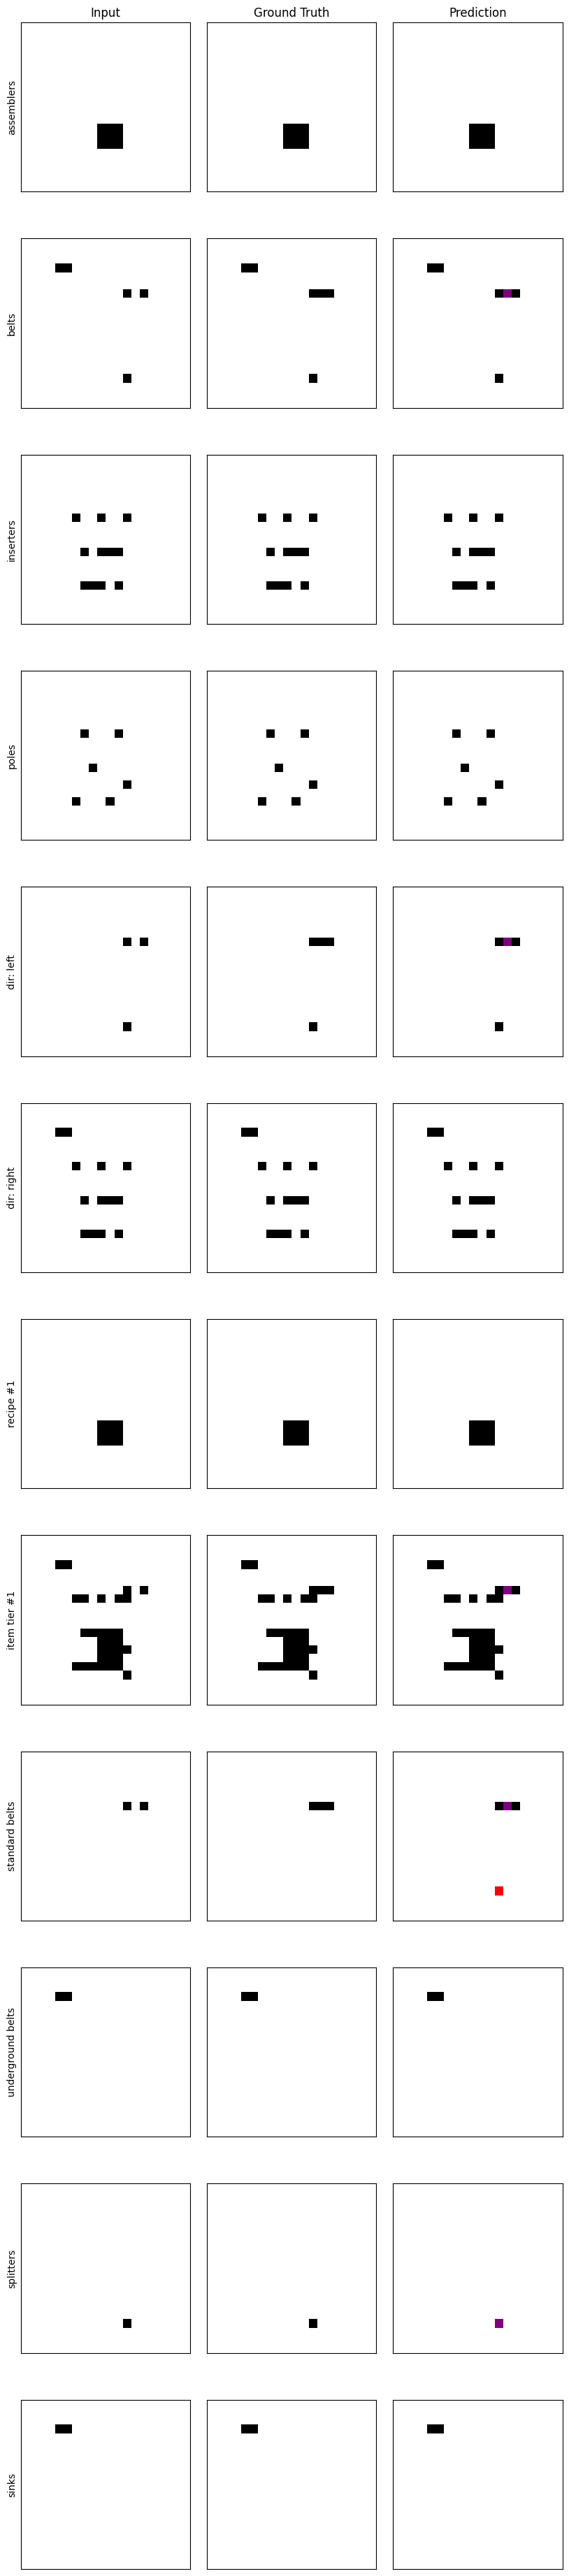

In [4]:
from src.model import BinaryMatrixTransformCNN, AttentiveBinaryMatrixTransformCNN
from src.visualization import visualize_manychannel_matrices
from src.pipeline.loaders import collate_numpy_matrices_without_conditions
from torch.utils.data import DataLoader
import torch

input_size=20

model = AttentiveBinaryMatrixTransformCNN(matrix_size=input_size)
filename = f"{model.filename}.pt"
model.load_state_dict(torch.load(filename))

dataloader = DataLoader(
    cached_dataset,
    batch_size=1, 
    collate_fn=collate_numpy_matrices_without_conditions
)
number_of_fixes = 2
L = len(list(dataloader))//4
X, Y = list(dataloader)[422 + 0*L]

O = X.clone()
for _ in range(number_of_fixes):
    O = model.predict(O)
visualize_manychannel_matrices(X[0], Y[0], O[0])